In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv", encoding='unicode_escape')

display(df.head(5))

display(df.tail(5))


print("-----------DATASET SHAPE------------")
print(f"Dataset shape: {df.shape}\n")

print("-----------DATASET Data Types------------")
print(f"Dataset data types: {df.dtypes}")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


-----------DATASET SHAPE------------
Dataset shape: (541909, 8)

-----------DATASET Data Types------------
Dataset data types: InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


## Data Preprocessing

In [3]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df=df.dropna(subset=['CustomerID'])
df=df.reset_index(drop=True)

In [5]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.loc[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
406595,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
406609,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
406612,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
406619,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [9]:
df=df.loc[~df.duplicated()]

In [10]:
idx_minus= df[(df['Quantity'] < 0) | (df['UnitPrice'] <= 0) ].index
df = df.drop(idx_minus)

In [11]:
df.reset_index(drop = True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Feature Engineering

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['DayCode'] = df['InvoiceDate'].dt.dayofweek
df['DateYMD'] = df["InvoiceDate"].dt.date
df['DateYM'] = df['InvoiceDate'].dt.to_period('M')
df['Day'] = df['InvoiceDate'].dt.day_name()
df['TotalPrice']= df['Quantity'] * df['UnitPrice']
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
DayCode                 int64
DateYMD                object
DateYM              period[M]
Day                    object
TotalPrice            float64
dtype: object

In [13]:
tot_spend=df.groupby('CustomerID')['TotalPrice'].sum()
tot_spend

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2045.53
18287.0     1837.28
Name: TotalPrice, Length: 4338, dtype: float64

In [14]:
df=df.merge(tot_spend,on='CustomerID')

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['country_code']=le.fit_transform(df['Country'])

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayCode,DateYMD,DateYM,Day,TotalPrice_x,TotalPrice_y,country_code
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2,2010-12-01,2010-12,Wednesday,15.30,5391.21,35
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,2010-12-01,2010-12,Wednesday,20.34,5391.21,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2,2010-12-01,2010-12,Wednesday,22.00,5391.21,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,2010-12-01,2010-12,Wednesday,20.34,5391.21,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,2010-12-01,2010-12,Wednesday,20.34,5391.21,35


## EDA

In [17]:
top15_country = df.groupby("Country")['TotalPrice_x'].sum().sort_values(ascending=False).head(15).reset_index()
top15_country

,Country,TotalPrice_x
0,United Kingdom,7285024.644
1,Netherlands,285446.340
2,EIRE,265262.460
3,Germany,228678.400
4,France,208934.310
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38367.830


Text(0, 0.5, 'Transaction Value')

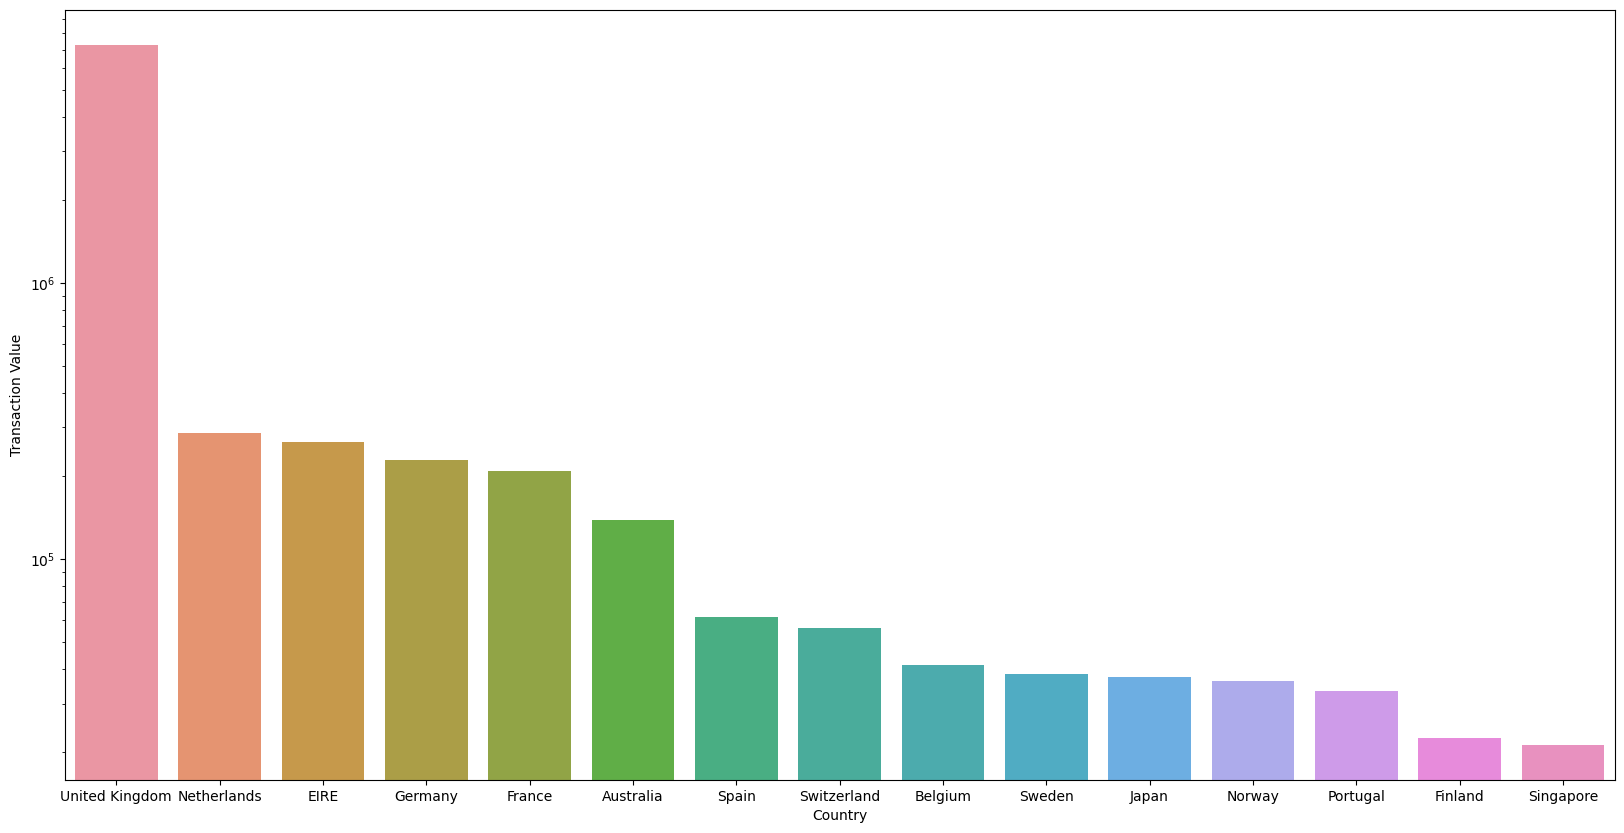

In [18]:
ax = sns.barplot(data=top15_country, x="Country", y="TotalPrice_x")
plt.yscale("log")
ax.figure.set_size_inches(20,10)
ax.set_ylabel("Transaction Value")

In [19]:
top5_producstgmv = df.groupby("Description").agg({"TotalPrice_x": "sum"}) \
                    .sort_values(by="TotalPrice_x", ascending=False).head(5) \
                    .reset_index() \
                    .rename(columns={"TotalPrice_x": "TransactionValue", "Description":"Products"}) 
top5_producstgmv

,Products,TransactionValue
0,"PAPER CRAFT , LITTLE BIRDIE",168469.60
1,REGENCY CAKESTAND 3 TIER,142264.75
2,WHITE HANGING HEART T-LIGHT HOLDER,100392.10
3,JUMBO BAG RED RETROSPOT,85040.54
4,MEDIUM CERAMIC TOP STORAGE JAR,81416.73


<AxesSubplot:xlabel='TransactionValue', ylabel='Products'>

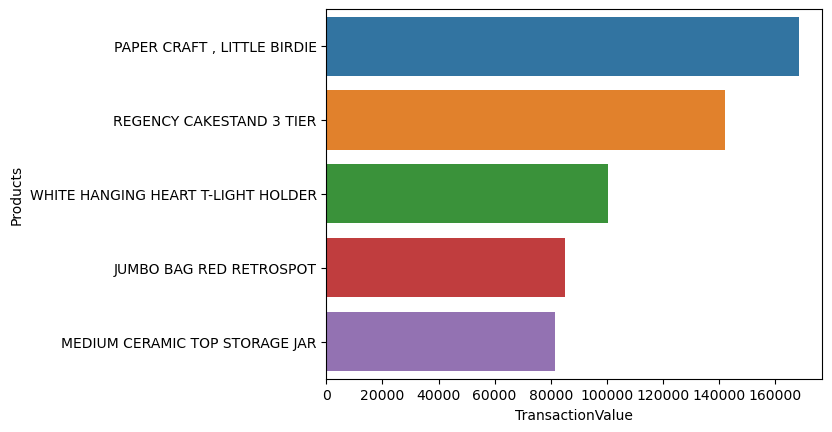

In [20]:
sns.barplot(data=top5_producstgmv, x="TransactionValue", y="Products")

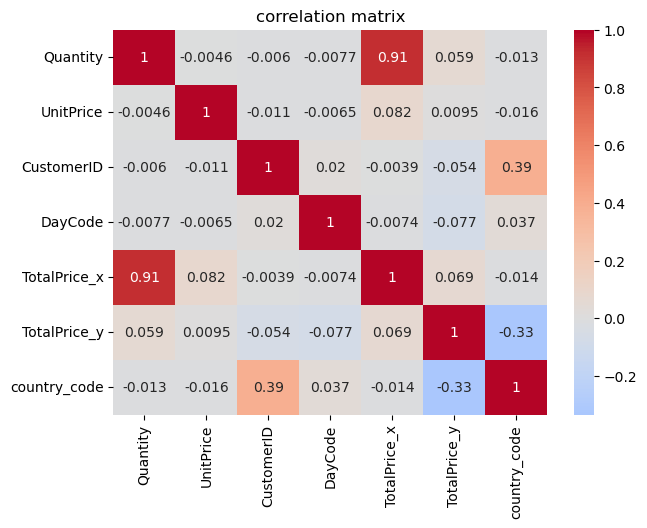

In [21]:
correlation_matrix=df.corr()
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0)
plt.title('correlation matrix')
plt.show()

# Regression Models

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score,confusion_matrix,f1_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt

In [23]:
x=df[['Quantity','DayCode','UnitPrice','country_code']]
y=df['TotalPrice_y']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [25]:
regressor_rf = RandomForestRegressor(n_estimators=100,random_state=0)

# fit the regressor with x and y data
regressor_rf.fit(x_train, y_train)
y_pred=regressor_rf.predict(x_test)

In [26]:
regressor_dt = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor_dt.fit(x_train, y_train)
y_pred1=regressor_dt.predict(x_test)

In [27]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred2=lr.predict(x_test)

### Model Evaluation and Cross Validation

In [28]:
print("Random Forest Regressor Prediction details: \n")
print("MAE  :",mae(y_test,y_pred))
print("MSE  :",mse(y_test,y_pred))
print("RMSE :",sqrt(mse(y_test,y_pred)))
print("r2_score :",r2_score(y_test,y_pred))

print()
print("Decision Tree Regressor Prediction details: \n")
print("MAE  :",mae(y_test,y_pred1))
print("MSE  :",mse(y_test,y_pred1))
print("RMSE :",sqrt(mse(y_test,y_pred1)))
print("r2_score :",r2_score(y_test,y_pred1))

print()
print("Linear Regression Prediction details: \n")
print("MAE  :",mae(y_test,y_pred2))
print("MSE  :",mse(y_test,y_pred2))
print("RMSE :",sqrt(mse(y_test,y_pred2)))
print("r2_score :",r2_score(y_test,y_pred2))


Random Forest Regressor Prediction details: 

MAE  : 6301.226242837712
MSE  : 175729125.82335263
RMSE : 13256.286275701526
r2_score : 0.8278590492496556

Decision Tree Regressor Prediction details: 

MAE  : 6279.713935881372
MSE  : 194515566.0415672
RMSE : 13946.88373944399
r2_score : 0.8094562052974881

Linear Regression Prediction details: 

MAE  : 13942.244267585083
MSE  : 906265760.4673783
RMSE : 30104.24821295789
r2_score : 0.11223908439538344


In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
scores1 = cross_val_score(regressor_rf, x_train, y_train, cv=5)
scores1

array([0.81539474, 0.81394735, 0.81157864, 0.80511735, 0.81630029])

In [31]:
scores1 = cross_val_score(regressor_dt, x_train, y_train, cv=5)
scores1

array([0.79783042, 0.78816798, 0.78521176, 0.78436624, 0.78531363])

In [32]:
scores1 = cross_val_score(lr, x_train, y_train, cv=5)
scores1

array([-1.61918444,  0.12492644,  0.12620351,  0.12472963,  0.12036015])

## Classification Models

In [33]:

new_column_name = {'TotalPrice_y': 'Annual Spending'} 
df.rename(columns=new_column_name, inplace=True)
# Get the most recent date from the 'InvoiceDate'
most_recent_date = df['InvoiceDate'].max()
#Calculate Recency based on the most recent date
rfm_data = df.groupby('CustomerID').agg({
'InvoiceDate': lambda x: (most_recent_date- x.max()).days,
'InvoiceNo': 'nunique',
'TotalPrice_x': 'sum'})
rfm_data.rename (columns={
'InvoiceDate': 'Recency',
'InvoiceNo': 'Frequency',
'TotalPrice_x': 'MonetaryValue'
}, inplace=True)
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


In [34]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
rmf_scaled=ss.fit_transform(rfm_data)

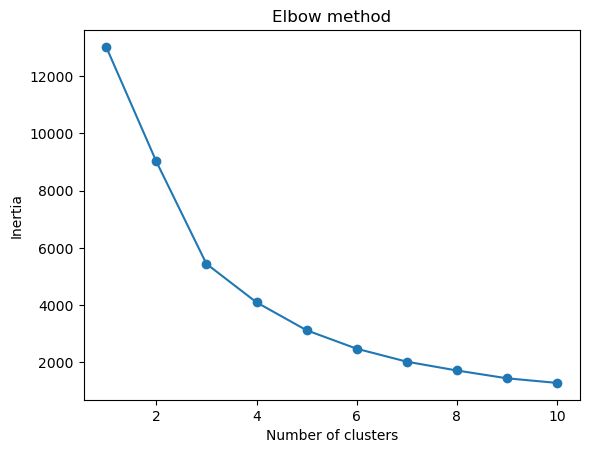

In [35]:
from sklearn.cluster import KMeans


inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rmf_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [38]:
kmeans=KMeans(n_clusters=6,random_state=42)
pd.DataFrame(kmeans.fit_predict(rmf_scaled)).value_counts()

1    2920
2    1057
0     334
4      21
3       4
5       2
dtype: int64